In [1]:
# Import module for data manipulation
import pandas as pd
# Import module for linear algebra
import numpy as np
# Import module for data visualization
from plotnine import *
import plotnine
# Import module for k-means
from sklearn.cluster import KMeans
# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
# Format scientific notation from Pandas
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt

from sklearn.compose import make_column_transformer,make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
df = pd.read_csv('data.csv')
df= df.drop(['customer_city','customer_state','customer_zip_code_prefix','seller_city','seller_state','customer_unique_id.1','order_purchase_timestamp','customer_unique_id'], axis=1)
df

,payment_type,payment_installments,product_category,order_item_id,product_id,seller_id,payment_value,review_score,price,freight_value,recency
0,credit_card,8.0,Home,1,1,1,141.90,5.0,129.90,12.00,112
1,credit_card,1.0,Health_Beauty,1,1,1,27.19,4.0,18.90,8.29,115
2,credit_card,8.0,Office_Supplies,1,1,1,86.22,3.0,69.00,17.22,538
3,credit_card,4.0,Technology,1,1,1,43.62,4.0,25.99,17.63,322
4,credit_card,6.0,Technology,1,1,1,196.89,5.0,180.00,16.89,289
...,...,...,...,...,...,...,...,...,...,...,...
91474,credit_card,10.0,Health_Beauty,2,2,2,4134.84,5.0,785.00,248.71,448
91475,credit_card,1.0,Baby,1,1,1,84.58,4.0,64.89,19.69,263
91476,credit_card,1.0,Automotive,1,1,1,112.46,5.0,89.90,22.56,569
91477,credit_card,5.0,Fashion_Accessories,1,1,1,133.69,5.0,115.00,18.69,120


In [3]:
transformer = make_column_transformer(
    (OneHotEncoder(sparse=False),make_column_selector(dtype_exclude=np.number)),
    (StandardScaler(),make_column_selector(dtype_include=np.number))
    )

In [4]:
df = transformer.fit_transform(df)

In [7]:
df

array([[ 0.        ,  0.        ,  0.        , ...,  0.02231765,
        -0.52203689, -0.83104401],
       [ 0.        ,  0.        ,  0.        , ..., -0.56578953,
        -0.75786279, -0.81141887],
       [ 0.        ,  0.        ,  0.        , ..., -0.30034656,
        -0.19022794,  1.95572536],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.18961287,
         0.1492088 ,  2.15851844],
       [ 0.        ,  0.        ,  0.        , ..., -0.05662647,
        -0.09678749, -0.77871031],
       [ 0.        ,  0.        ,  0.        , ..., -0.3639787 ,
        -0.35867501,  1.60901462]])

In [5]:
# Choose optimal K using Elbow method
inertia = []
for cluster in range(1, 10):
        kmeans = KMeans( n_clusters = cluster)
        kmeans.fit(df)
        inertia.append(kmeans.inertia_)
        print('Cluster initiation: {}'.format(cluster))



Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


Text(0, 0.5, 'Cout du modèle (inertia)')

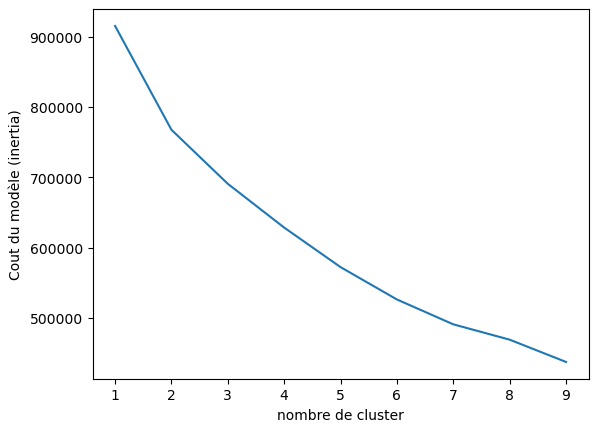

In [6]:
plt.plot(range(1,10),inertia)
plt.xlabel('nombre de cluster')
plt.ylabel('Cout du modèle (inertia)')